In [1]:
!pip install pandas pandas-ta

In [2]:
import pandas_ta as ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import load_dataset

In [3]:
df = load_dataset('./AMZN.csv')
df = df.iloc[::-1]
df = df.reset_index(drop=True)

In [4]:
df

,Close,Volume,Open,High,Low
0,14.2410,48396380,14.3275,14.4165,14.2250
1,14.2785,49548580,14.2595,14.4780,14.1740
2,14.3545,31705200,14.2940,14.4758,14.2870
3,14.2285,36301420,14.2545,14.4250,14.1915
4,14.4865,28451720,14.2400,14.4935,14.2400
...,...,...,...,...,...
2510,139.9400,51710500,140.6200,140.8400,138.4200
2511,137.8500,50017350,139.9700,140.3200,137.1000
2512,138.5600,58928400,139.0750,140.4100,137.4900
2513,138.4100,42905830,137.4000,139.3300,137.0000


In [5]:
df.iloc[0]

Close     1.424100e+01
Volume    4.839638e+07
Open      1.432750e+01
High      1.441650e+01
Low       1.422500e+01
Name: 0, dtype: float64

In [6]:
df.iloc[2]

Close     1.435450e+01
Volume    3.170520e+07
Open      1.429400e+01
High      1.447580e+01
Low       1.428700e+01
Name: 2, dtype: float64

In [7]:
prices = df.loc[:, 'Close'].to_numpy()

In [8]:
ma1 = df.ta.sma(length=20).to_numpy()
ma1 = np.where(np.isfinite(ma1), ma1, 0)

ma2 = df.ta.sma(length=50).to_numpy()
ma2 = np.where(np.isfinite(ma2), ma2, 0)

ma3 = df.ta.sma(length=100).to_numpy()
ma3 = np.where(np.isfinite(ma3), ma3, 0)

In [16]:
frame_start = 0
frame_end = 300
prices = prices[frame_start:frame_end]
#rsi = rsi[frame_start:frame_end]
ma1 = ma1[frame_start:frame_end]
ma2 = ma2[frame_start:frame_end]
ma3 = ma3[frame_start:frame_end]
prices.size

300

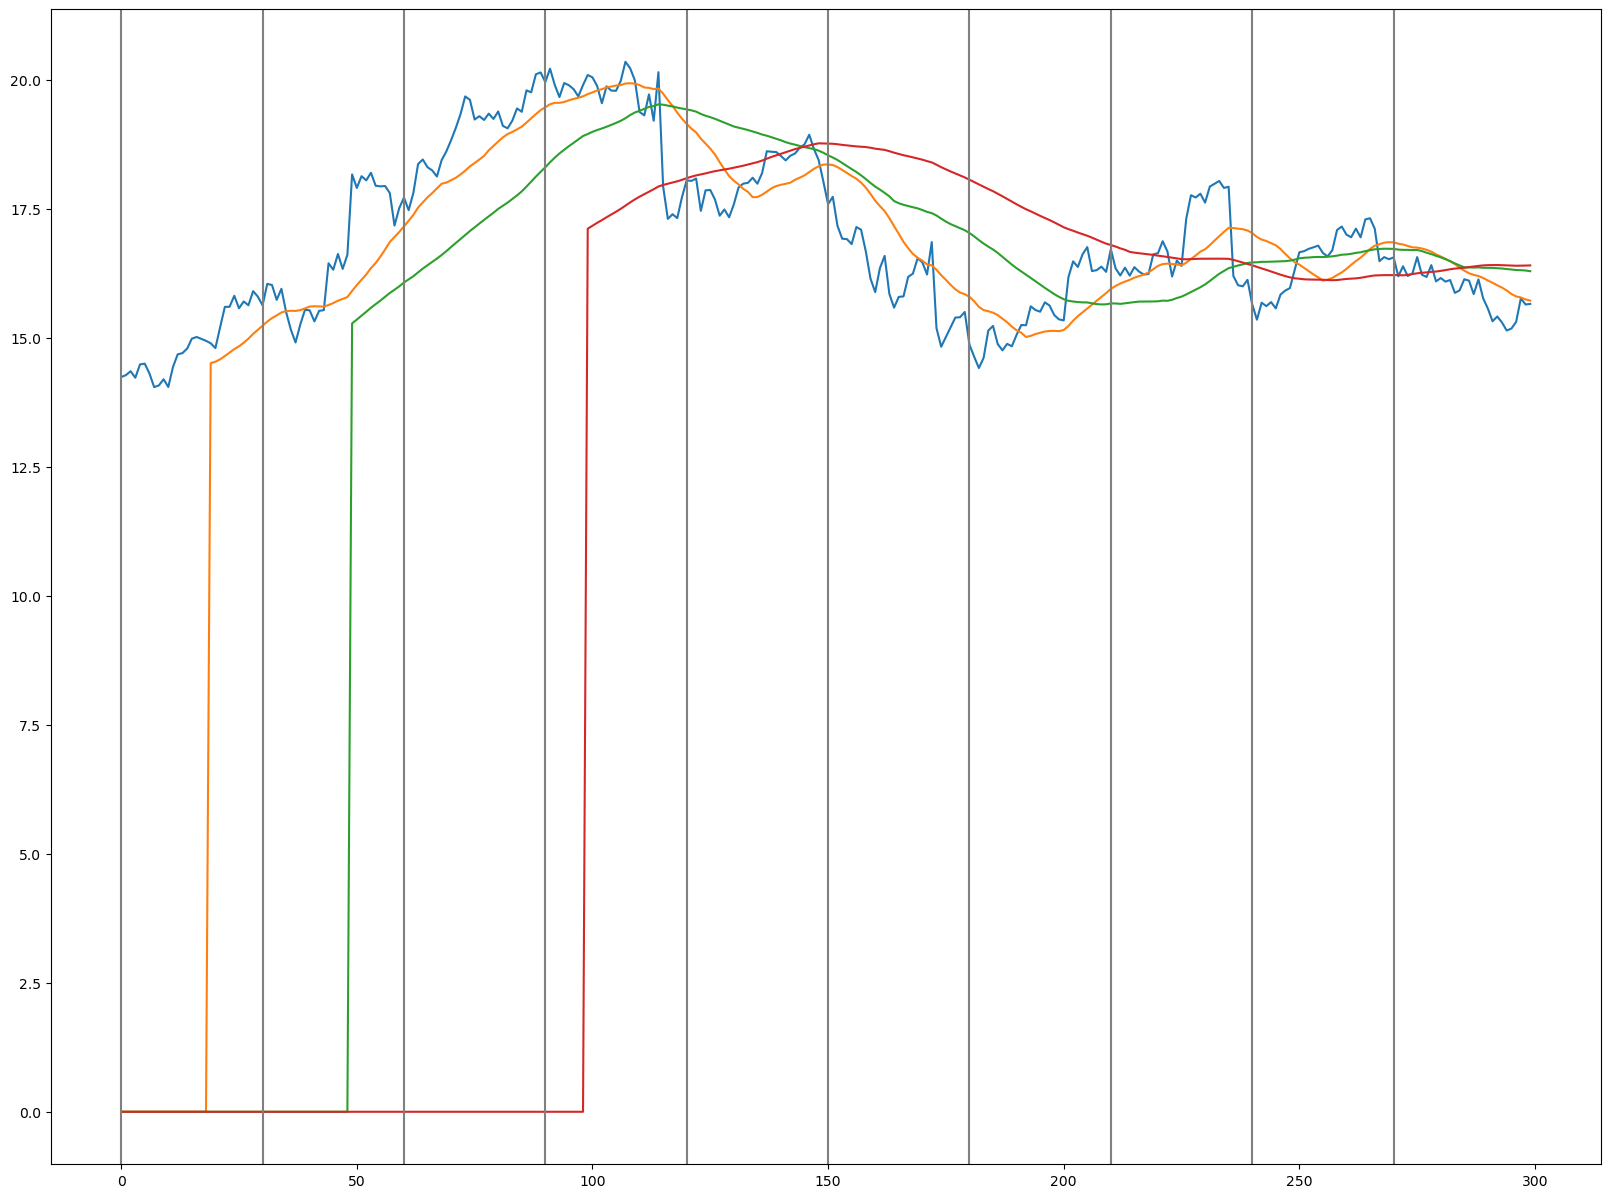

In [18]:
#plt.cla()
plt.figure(figsize=(20, 15))
plt.plot(prices)
#plt.plot(rsi)
plt.plot(ma1)
plt.plot(ma2)
plt.plot(ma3)

frames = range(0, prices.size, 30)
#plt.axvline(x=136, color='gray')
for x in frames:
    plt.axvline(x=x, color='gray')
#plt.show()
plt.savefig('./test.png')